### Samriddhi M: Salesforce Project


In [1]:
import yfinance as yf, pandas as pd, numpy as np
import os, shutil, kagglehub

## Data Preparations

### Get the stocks prices


In [2]:
# https://gist.github.com/yashveersinghsohi/060d1dc1311142f387d1c0ba8267e230
# for dowloading S&P 500
TICKERS = ["AAPL","MSFT","GOOGL","AMZN","META","NVDA","TSLA","SPY", "^GSPC"]
START, END = "2015-01-01", None

data = yf.download(" ".join(TICKERS), start=START, end=END, auto_adjust=True, actions=True)

stacked = (data.stack(level=1)
        .rename_axis(index=["Date","Ticker"])
        .reset_index()
        .sort_values(["Ticker","Date"]))

stacked['Ticker'] = stacked['Ticker'].replace('^GSPC', 'S&P 500')
SP500_df = stacked[stacked['Ticker'] == 'S&P 500']

[*********************100%***********************]  9 of 9 completed
/tmp/ipython-input-2564575360.py:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stacked = (data.stack(level=1)


In [3]:
SP500_df

Price,Date,Ticker,Capital Gains,Close,Dividends,High,Low,Open,Stock Splits,Volume
8,2015-01-02,S&P 500,NaN,2058.199951,0.0,2072.360107,2046.040039,2058.899902,0.0,2708700000
17,2015-01-05,S&P 500,NaN,2020.579956,0.0,2054.439941,2017.339966,2054.439941,0.0,3799120000
26,2015-01-06,S&P 500,NaN,2002.609985,0.0,2030.250000,1992.439941,2022.150024,0.0,4460110000
35,2015-01-07,S&P 500,NaN,2025.900024,0.0,2029.609985,2005.550049,2005.550049,0.0,3805480000
44,2015-01-08,S&P 500,NaN,2062.139893,0.0,2064.080078,2030.609985,2030.609985,0.0,3934010000
...,...,...,...,...,...,...,...,...,...,...
24857,2025-12-24,S&P 500,NaN,6932.049805,0.0,6937.319824,6904.910156,6904.910156,0.0,1798270000
24866,2025-12-26,S&P 500,NaN,6929.939941,0.0,6945.770020,6921.600098,6936.020020,0.0,2586550000
24875,2025-12-29,S&P 500,NaN,6905.740234,0.0,6920.209961,6888.759766,6903.600098,0.0,3541750000
24884,2025-12-30,S&P 500,NaN,6896.240234,0.0,6913.250000,6893.470215,6900.439941,0.0,3309930000


In [4]:
stacked

Price,Date,Ticker,Capital Gains,Close,Dividends,High,Low,Open,Stock Splits,Volume
0,2015-01-02,AAPL,NaN,24.237556,0.0,24.705326,23.798606,24.694241,0.0,212818400
9,2015-01-05,AAPL,NaN,23.554741,0.0,24.086801,23.368521,24.006992,0.0,257142000
18,2015-01-06,AAPL,NaN,23.556957,0.0,23.816336,23.195599,23.619031,0.0,263188400
27,2015-01-07,AAPL,NaN,23.887278,0.0,23.987038,23.654501,23.765347,0.0,160423600
36,2015-01-08,AAPL,NaN,24.805079,0.0,24.862719,24.097882,24.215380,0.0,237458000
...,...,...,...,...,...,...,...,...,...,...
24857,2025-12-24,S&P 500,NaN,6932.049805,0.0,6937.319824,6904.910156,6904.910156,0.0,1798270000
24866,2025-12-26,S&P 500,NaN,6929.939941,0.0,6945.770020,6921.600098,6936.020020,0.0,2586550000
24875,2025-12-29,S&P 500,NaN,6905.740234,0.0,6920.209961,6888.759766,6903.600098,0.0,3541750000
24884,2025-12-30,S&P 500,NaN,6896.240234,0.0,6913.250000,6893.470215,6900.439941,0.0,3309930000


In [5]:
stock_df = stacked[['Date', 'Ticker', 'Close']]


In [6]:
stock_df.head()

Price,Date,Ticker,Close
0,2015-01-02,AAPL,24.237556
9,2015-01-05,AAPL,23.554741
18,2015-01-06,AAPL,23.556957
27,2015-01-07,AAPL,23.887278
36,2015-01-08,AAPL,24.805079


### Get the news data from the kaggle

In [7]:
# Kaggle Data loading and putting in the content folder
# !pip -q install kagglehub

src_path = kagglehub.dataset_download("notlucasp/financial-news-headlines")
print("KaggleHub cached at:", src_path)

dst_dir = "/content/news_data"
shutil.copytree(src_path, dst_dir, dirs_exist_ok=True)


100%|██████████| 3.91M/3.91M [00:00<00:00, 122MB/s]

Extracting files...
KaggleHub cached at: /root/.cache/kagglehub/datasets/notlucasp/financial-news-headlines/versions/2


'/content/news_data'

In [8]:
cnbc = pd.read_csv('news_data/cnbc_headlines.csv')
guardian = pd.read_csv('news_data/guardian_headlines.csv')
reuters = pd.read_csv('news_data/reuters_headlines.csv')
cnbc = cnbc.dropna().reset_index(drop=True)
guardian = guardian.dropna().reset_index(drop=True)
reuters = reuters.dropna().reset_index(drop=True)

In [9]:
cnbc

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies..."
...,...,...,...
2795,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f..."
2796,Cramer Remix: The biggest mistake you can make...,"11:12 AM ET Thu, 20 Sept 2018",Jim Cramer revealed his top rule when it comes...
2797,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...
2798,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di..."


In [10]:
guardian

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...
...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...
17798,17-Dec-17,Unilever sells household name spreads to KKR f...


In [11]:
reuters

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


#### Convert the Time format in news to the prices

In [12]:
def convert_date(date):
  return pd.to_datetime(date).strftime("%Y-%m-%d")

cnbc['Trading Date'] = cnbc['Time'].str.split(', ').str[1]
cnbc['Date'] = cnbc['Trading Date'].apply(convert_date)


In [13]:
cnbc_df = cnbc[['Headlines', 'Date']].copy()
cnbc_df['Source'] = 'CNBC'


In [14]:
def convert_date_guardian(info):
  day = info[0]
  month = info[1]
  year = '20' + info[2]
  date = day + ' ' + month + ' ' + year
  return pd.to_datetime(date).strftime("%Y-%m-%d")
guardian['Trading Date'] = guardian['Time'].str.split('-')
guardian = guardian[guardian['Trading Date'].str.len() >= 3]
guardian['Date'] = guardian['Trading Date'].apply(convert_date_guardian)
guardian

/tmp/ipython-input-1451569830.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian['Date'] = guardian['Trading Date'].apply(convert_date_guardian)


,Time,Headlines,Trading Date,Date
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery,"[18, Jul, 20]",2020-07-18
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...,"[18, Jul, 20]",2020-07-18
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...,"[18, Jul, 20]",2020-07-18
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...,"[18, Jul, 20]",2020-07-18
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...,"[18, Jul, 20]",2020-07-18
...,...,...,...,...
17795,17-Dec-17,How investing in solar energy can create a bri...,"[17, Dec, 17]",2017-12-17
17796,17-Dec-17,Poundland suppliers hit by insurance downgrade,"[17, Dec, 17]",2017-12-17
17797,17-Dec-17,Cryptocurrencies: City watchdog to investigate...,"[17, Dec, 17]",2017-12-17
17798,17-Dec-17,Unilever sells household name spreads to KKR f...,"[17, Dec, 17]",2017-12-17


In [15]:
guardian_df = guardian[['Headlines', 'Date']]
guardian_df['Source'] = 'Guardian'

/tmp/ipython-input-2981415976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guardian_df['Source'] = 'Guardian'


In [16]:
reuters['Date'] = reuters['Time'].apply(convert_date)

In [17]:
reuters_df = reuters[['Headlines', 'Date']].copy()
reuters_df['Source'] = 'Reuters'

In [18]:
all_news = pd.concat([cnbc_df, guardian_df, reuters_df], ignore_index=True)
all_news.sort_values(by='Date', inplace=True)

In [19]:
all_news

,Headlines,Date,Source
20559,The Guardian view on Ryanair’s model: a union-...,2017-12-17,Guardian
20544,Butchers carve out a niche as UK shoppers opt ...,2017-12-17,Guardian
20543,Grogonomics \n\n\n This year has been about ...,2017-12-17,Guardian
20542,Youngest staff to be given UK workplace pensio...,2017-12-17,Guardian
20540,Peter Preston on press and broadcasting \n\n\...,2017-12-17,Guardian
...,...,...,...
2817,World Bank calls on creditors to cut poorest n...,2020-07-18,Guardian
2818,British Airways retires Boeing 747 fleet as Co...,2020-07-18,Guardian
2819,What will changes to England's lockdown rules ...,2020-07-18,Guardian
2811,Atol protection to be extended to vouchers on ...,2020-07-18,Guardian


In [20]:
all_news.columns

Index(['Headlines', 'Date', 'Source'], dtype='object')

In [21]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded = encoder.fit_transform(all_news[['Source']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(['Source']))
all_news = all_news.join(encoded_df).drop('Source', axis=1)

In [22]:
all_news['Date'].min()

'2017-12-17'

In [23]:
SP500 = SP500_df.copy()
SP500 = SP500[['Date', 'Close', 'Volume', 'High', 'Low', 'Open']]
# SP500 = SP500[(SP500['Date'] >= all_news['Date'].min()) & (SP500['Date'] <= all_news['Date'].max())]
SP500

Price,Date,Close,Volume,High,Low,Open
8,2015-01-02,2058.199951,2708700000,2072.360107,2046.040039,2058.899902
17,2015-01-05,2020.579956,3799120000,2054.439941,2017.339966,2054.439941
26,2015-01-06,2002.609985,4460110000,2030.250000,1992.439941,2022.150024
35,2015-01-07,2025.900024,3805480000,2029.609985,2005.550049,2005.550049
44,2015-01-08,2062.139893,3934010000,2064.080078,2030.609985,2030.609985
...,...,...,...,...,...,...
24857,2025-12-24,6932.049805,1798270000,6937.319824,6904.910156,6904.910156
24866,2025-12-26,6929.939941,2586550000,6945.770020,6921.600098,6936.020020
24875,2025-12-29,6905.740234,3541750000,6920.209961,6888.759766,6903.600098
24884,2025-12-30,6896.240234,3309930000,6913.250000,6893.470215,6900.439941


In [24]:
temp_df = pd.DataFrame(SP500['Open'].shift(-1))
temp_df.columns = ['Next_Open']
temp_df = temp_df.join(SP500)
SP500_final = temp_df[(temp_df['Date'] >= all_news['Date'].min()) &\
                      (temp_df['Date'] <= all_news['Date'].max())]
SP500_final

,Next_Open,Date,Close,Volume,High,Low,Open
6722,2692.709961,2017-12-18,2690.159912,3727770000,2694.969971,2685.919922,2685.919922
6731,2688.179932,2017-12-19,2681.469971,3407680000,2694.439941,2680.739990,2692.709961
6740,2683.020020,2017-12-20,2679.250000,3246230000,2691.010010,2676.110107,2688.179932
6749,2684.219971,2017-12-21,2684.570068,3293130000,2692.639893,2682.399902,2683.020020
6758,2679.090088,2017-12-22,2683.340088,2401030000,2685.350098,2678.129883,2684.219971
...,...,...,...,...,...,...,...
12518,3141.110107,2020-07-13,3155.219971,4902440000,3235.320068,3149.429932,3205.080078
12527,3225.979980,2020-07-14,3197.520020,4507140000,3200.949951,3127.659912,3141.110107
12536,3208.360107,2020-07-15,3226.560059,4686830000,3238.280029,3200.760010,3225.979980
12545,3224.209961,2020-07-16,3215.570068,3972860000,3220.389893,3198.590088,3208.360107


In [25]:
# SP500_df
# pd.set_option('display.max_rows', None)
all_news

,Headlines,Date,Source_CNBC,Source_Guardian,Source_Reuters
20559,The Guardian view on Ryanair’s model: a union-...,2017-12-17,0.0,0.0,1.0
20544,Butchers carve out a niche as UK shoppers opt ...,2017-12-17,1.0,0.0,0.0
20543,Grogonomics \n\n\n This year has been about ...,2017-12-17,1.0,0.0,0.0
20542,Youngest staff to be given UK workplace pensio...,2017-12-17,1.0,0.0,0.0
20540,Peter Preston on press and broadcasting \n\n\...,2017-12-17,0.0,0.0,1.0
...,...,...,...,...,...
2817,World Bank calls on creditors to cut poorest n...,2020-07-18,0.0,0.0,1.0
2818,British Airways retires Boeing 747 fleet as Co...,2020-07-18,0.0,0.0,1.0
2819,What will changes to England's lockdown rules ...,2020-07-18,0.0,0.0,1.0
2811,Atol protection to be extended to vouchers on ...,2020-07-18,0.0,0.0,1.0


### Work on the news headline analysis

FinBERT block

In [26]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
import torch
print("GPU available:", torch.cuda.is_available())
device = 0 if torch.cuda.is_available() else -1
MODEL_NAME = "ProsusAI/finbert"
df = all_news.copy()
clf = pipeline(
    "text-classification",
    model=MODEL_NAME,
    tokenizer=MODEL_NAME,
    return_all_scores=True,
    truncation=True,
    batch_size=32,
    device=device
)

def batched(iterable, n=512):
    for i in range(0, len(iterable), n):
        yield iterable[i:i+n]

all_scores = []
for batch in batched(df["Headlines"].tolist(), n=512):
    all_scores.extend(clf(batch))

labels = []
pos_prob, neu_prob, neg_prob = [], [], []
for score_list in all_scores:

    d = {s["label"].lower(): s["score"] for s in score_list}
    pos_prob.append(d.get("positive", d.get("pos", 0.0)))
    neu_prob.append(d.get("neutral", d.get("neu", 0.0)))
    neg_prob.append(d.get("negative", d.get("neg", 0.0)))
    labels.append(max(d, key=d.get))

df["label"] = labels
df["p_pos"] = pos_prob
df["p_neu"] = neu_prob
df["p_neg"] = neg_prob
df

GPU available: True


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,Headlines,Date,Source_CNBC,Source_Guardian,Source_Reuters,label,p_pos,p_neu,p_neg
20559,The Guardian view on Ryanair’s model: a union-...,2017-12-17,0.0,0.0,1.0,neutral,0.079081,0.903235,0.017684
20544,Butchers carve out a niche as UK shoppers opt ...,2017-12-17,1.0,0.0,0.0,neutral,0.321952,0.658565,0.019483
20543,Grogonomics \n\n\n This year has been about ...,2017-12-17,1.0,0.0,0.0,neutral,0.036052,0.678951,0.284997
20542,Youngest staff to be given UK workplace pensio...,2017-12-17,1.0,0.0,0.0,neutral,0.024376,0.539174,0.436449
20540,Peter Preston on press and broadcasting \n\n\...,2017-12-17,0.0,0.0,1.0,neutral,0.040036,0.904399,0.055565
...,...,...,...,...,...,...,...,...,...
2817,World Bank calls on creditors to cut poorest n...,2020-07-18,0.0,0.0,1.0,negative,0.043782,0.098705,0.857514
2818,British Airways retires Boeing 747 fleet as Co...,2020-07-18,0.0,0.0,1.0,negative,0.037162,0.101310,0.861529
2819,What will changes to England's lockdown rules ...,2020-07-18,0.0,0.0,1.0,neutral,0.042328,0.881697,0.075974
2811,Atol protection to be extended to vouchers on ...,2020-07-18,0.0,0.0,1.0,neutral,0.290971,0.698193,0.010837


In [27]:
df_news = df.copy()
df_px = SP500_final.copy()
df_px = df_px.sort_values("Date").reset_index(drop=True)
df_news = df_news.sort_values("Date").reset_index(drop=True)

In [28]:
def make_news_features(news: pd.DataFrame) -> pd.DataFrame:
    news = news.copy()
    label_map = {"positive":1,"pos":1,"negative":-1,"neg":-1,"neutral":0,"neu":0}
    news["sent_score"] = news["label"].str.lower().map(label_map).fillna(0)

    g = news.groupby("Date")
    daily = pd.DataFrame({
        "sent_mean_t": g["sent_score"].mean(),
        "pos_share_t": g["p_pos"].mean(),
        "neg_share_t": g["p_neg"].mean(),
        "neu_share_t": g["p_neu"].mean(),
        "n_headlines_t": g.size()
    }).reset_index()


    news["strong_pos"] = (news["p_pos"]>=0.8).astype(int)
    news["strong_neg"] = (news["p_neg"]>=0.8).astype(int)
    daily2 = news.groupby("Date")[["strong_pos","strong_neg"]].mean().reset_index()
    daily = daily.merge(daily2, on="Date", how="left")
    daily["tail_diff_t"] = daily["strong_pos"] - daily["strong_neg"]

    source_cols = [c for c in news.columns if c.startswith("Source_")]
    if source_cols:
        src = news.groupby("Date")[source_cols].sum().reset_index()
        for c in source_cols:
            src[c] = (src[c]>0).astype(int)
        src["source_diversity_t"] = src[source_cols].sum(axis=1)
        daily = daily.merge(src[["Date","source_diversity_t"]], on="Date", how="left")
    else:
        daily["source_diversity_t"] = 0

    fill_cols = [c for c in daily.columns if c!="Date"]
    daily[fill_cols] = daily[fill_cols].fillna(0)
    return daily

news_feat = make_news_features(df_news)
print(news_feat.head(5))

         Date  sent_mean_t  pos_share_t  neg_share_t  neu_share_t  \
0  2017-12-17        -0.10     0.174274     0.287308     0.538418   
1  2017-12-18        -0.40     0.134951     0.427190     0.437860   
2  2017-12-19        -0.30     0.098566     0.410148     0.491286   
3  2017-12-20        -0.35     0.153501     0.408590     0.437910   
4  2017-12-21        -0.45     0.094427     0.396805     0.508767   

   n_headlines_t  strong_pos  strong_neg  tail_diff_t  source_diversity_t  
0             20        0.05       0.200       -0.150                   2  
1             40        0.05       0.275       -0.225                   3  
2             20        0.00       0.350       -0.350                   2  
3             20        0.00       0.300       -0.300                   2  
4             20        0.00       0.200       -0.200                   2  


In [29]:

# news_feat['Date']
# feat = df_px.join(news_feat, on = 'Date')
# df_px
# feat = df_px.join(news_feat, on='Date')
# news_feat
df_px["Date"] = pd.to_datetime(df_px["Date"]).dt.date
news_feat["Date"]  = pd.to_datetime(news_feat["Date"]).dt.date

assert not df_px["Date"].duplicated().any(), "price_feat 里 Date 有重复"
assert not news_feat["Date"].duplicated().any(),  "news_feat 里 Date 有重复（没聚合？）"

feat = df_px.merge(news_feat, on="Date", how="left", validate="one_to_one")

In [30]:
feat

,Next_Open,Date,Close,Volume,High,Low,Open,sent_mean_t,pos_share_t,neg_share_t,neu_share_t,n_headlines_t,strong_pos,strong_neg,tail_diff_t,source_diversity_t
0,2692.709961,2017-12-18,2690.159912,3727770000,2694.969971,2685.919922,2685.919922,-0.400000,0.134951,0.427190,0.437860,40.0,0.050000,0.275000,-0.225000,3.0
1,2688.179932,2017-12-19,2681.469971,3407680000,2694.439941,2680.739990,2692.709961,-0.300000,0.098566,0.410148,0.491286,20.0,0.000000,0.350000,-0.350000,2.0
2,2683.020020,2017-12-20,2679.250000,3246230000,2691.010010,2676.110107,2688.179932,-0.350000,0.153501,0.408590,0.437910,20.0,0.000000,0.300000,-0.300000,2.0
3,2684.219971,2017-12-21,2684.570068,3293130000,2692.639893,2682.399902,2683.020020,-0.450000,0.094427,0.396805,0.508767,20.0,0.000000,0.200000,-0.200000,2.0
4,2679.090088,2017-12-22,2683.340088,2401030000,2685.350098,2678.129883,2684.219971,-0.217391,0.188427,0.297866,0.513707,23.0,0.086957,0.217391,-0.130435,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,3141.110107,2020-07-13,3155.219971,4902440000,3235.320068,3149.429932,3205.080078,-0.200000,0.216743,0.381406,0.401851,85.0,0.094118,0.305882,-0.211765,3.0
645,3225.979980,2020-07-14,3197.520020,4507140000,3200.949951,3127.659912,3141.110107,-0.201754,0.231314,0.385918,0.382768,114.0,0.087719,0.245614,-0.157895,3.0
646,3208.360107,2020-07-15,3226.560059,4686830000,3238.280029,3200.760010,3225.979980,-0.073171,0.278595,0.337260,0.384145,123.0,0.105691,0.235772,-0.130081,3.0
647,3224.209961,2020-07-16,3215.570068,3972860000,3220.389893,3198.590088,3208.360107,-0.239316,0.198061,0.429175,0.372763,117.0,0.111111,0.316239,-0.205128,3.0


## Modeling


In [31]:
target = "Next_Open"
df_feat = feat.dropna()
drop_cols = ["Date", target]
feature_cols = [c for c in feat.columns if c not in drop_cols]
X = df_feat[feature_cols]
y = df_feat[target]


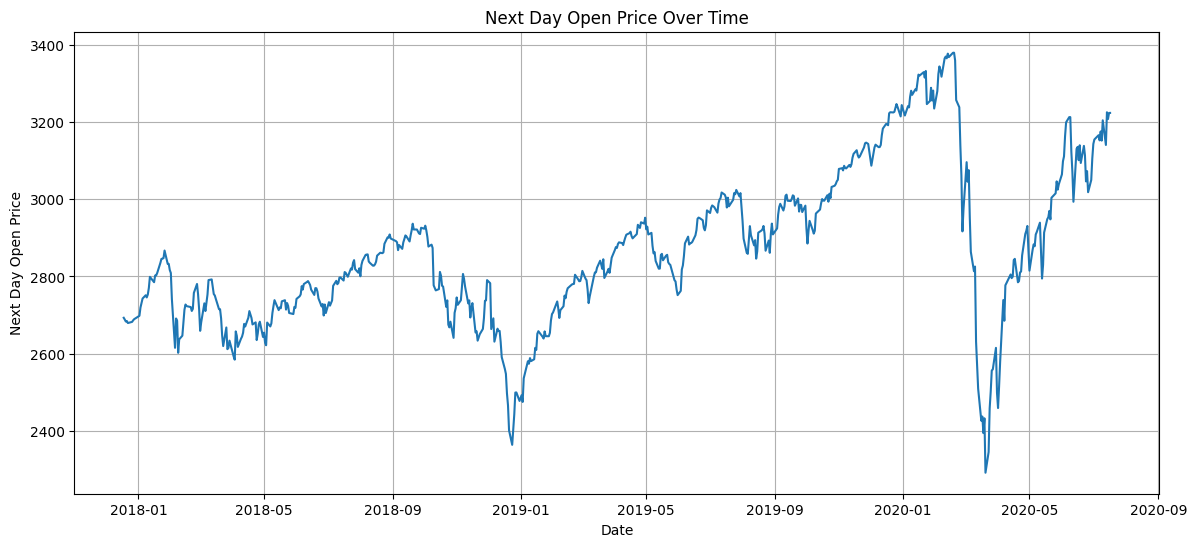

In [32]:
#plot target over time
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df_feat['Date'], df_feat['Next_Open'])
plt.title("Next Day Open Price Over Time")
plt.xlabel("Date")
plt.ylabel("Next Day Open Price")
plt.grid(True)
plt.show()


In [33]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

split_idx = int(len(feat)*0.8)
X_train, y_train = X.iloc[:split_idx], y.iloc[:split_idx]
X_test,  y_test  = X.iloc[split_idx:],  y.iloc[split_idx:]

graph_final = df_feat[['Date']].iloc[split_idx:]
model = xgb.XGBRegressor(objective='reg:squarederror',
                         n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.3f}')
print(f'R²: {r2:.3f}')

RMSE: 51.501
R²: 0.964


The model explains 96.4% of the variance in tomorrows opening price

Changing Feature to Overnight Open Change (no leakage)

In [34]:
# --------------------------------------------------
# NEW TARGET: overnight open change (no leakage)
# --------------------------------------------------

df_feat = df_feat.copy()

df_feat["Next_Open_Change"] = df_feat["Next_Open"] - df_feat["Open"]

# sanity check
print(df_feat[["Date","Open","Next_Open","Next_Open_Change"]].head())
print("Mean absolute gap:",
      df_feat["Next_Open_Change"].abs().mean())


         Date         Open    Next_Open  Next_Open_Change
0  2017-12-18  2685.919922  2692.709961          6.790039
1  2017-12-19  2692.709961  2688.179932         -4.530029
2  2017-12-20  2688.179932  2683.020020         -5.159912
3  2017-12-21  2683.020020  2684.219971          1.199951
4  2017-12-22  2684.219971  2679.090088         -5.129883
Mean absolute gap: 22.288943259756568


In [35]:
feature_cols = [
    "Close","High","Low","Volume",
    "sent_mean_t",
    "pos_share_t","neg_share_t","neu_share_t",
    "n_headlines_t",
    "strong_pos","strong_neg","tail_diff_t",
    "source_diversity_t"
]

X = df_feat[feature_cols].copy()
y = df_feat["Next_Open_Change"].copy()
dates = df_feat["Date"].copy()


In [36]:
split_idx = int(len(df_feat) * 0.8)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
dates_test = dates.iloc[split_idx:]


Try XGBoot on New feature

In [37]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=800,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("\n--- XGBOOST (OVERNIGHT OPEN CHANGE) ---")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.4f}")



--- XGBOOST (OVERNIGHT OPEN CHANGE) ---
MAE:  41.987
RMSE: 54.005
R²:   0.0618


In [38]:
# Baseline: predict zero change (tomorrow opens same as today)
baseline_pred = np.zeros_like(y_test.values)

rmse_base = np.sqrt(mean_squared_error(y_test, baseline_pred))
r2_base   = r2_score(y_test, baseline_pred)

print("\nBaseline (predict no overnight move):")
print(f"RMSE: {rmse_base:.3f}")
print(f"R²:   {r2_base:.4f}")



Baseline (predict no overnight move):
RMSE: 55.757
R²:   -0.0000


In [39]:
import numpy as np

df_feat = df_feat.copy()
df_feat["log_ret_t1"] = np.log(df_feat["Next_Open"] / df_feat["Open"])

print(df_feat["log_ret_t1"].describe())


count    647.000000
mean       0.000283
std        0.011840
min       -0.071410
25%       -0.003788
50%        0.001164
75%        0.005816
max        0.060343
Name: log_ret_t1, dtype: float64


In [40]:
feature_cols = [
    "Close","High","Low","Volume",
    "sent_mean_t",
    "pos_share_t","neg_share_t","neu_share_t",
    "n_headlines_t",
    "strong_pos","strong_neg","tail_diff_t",
    "source_diversity_t"
]

X = df_feat[feature_cols]
y = df_feat["log_ret_t1"]


In [41]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

split_idx = int(len(df_feat) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=800,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("\n--- XGBOOST (LOG RETURN) ---")
print(f"MAE:  {mae:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"R²:   {r2:.4f}")



--- XGBOOST (LOG RETURN) ---
MAE:  0.014556
RMSE: 0.019137
R²:   0.0588


Does news actually help overnight log return and next day open price ?

In [42]:
#predict zero return
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred0 = np.zeros_like(y_test.values)
print("Zero-return baseline",
      "MAE", mean_absolute_error(y_test, y_pred0),
      "RMSE", np.sqrt(mean_squared_error(y_test, y_pred0)),
      "R2", r2_score(y_test, y_pred0))


Zero-return baseline MAE 0.014458668641762516 RMSE 0.019725193266714132 R2 -3.163559136520888e-05


In [43]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# -------------------------------
# BASELINE 2: MARKET-ONLY XGBOOST
# -------------------------------

# Features (market only)
market_feature_cols = [
    "Close",
    "High",
    "Low",
    "Volume"
]

X_mkt = df_feat[market_feature_cols].copy()
y = df_feat["log_ret_t1"].copy()

# Same time-based split as before
split_idx = int(len(df_feat) * 0.8)
X_train, X_test = X_mkt.iloc[:split_idx], X_mkt.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# XGBoost model (same hyperparams as final model)
model_mkt = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=800,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model_mkt.fit(X_train, y_train)
y_pred_mkt = model_mkt.predict(X_test)

# Metrics
rmse_mkt = np.sqrt(mean_squared_error(y_test, y_pred_mkt))
mae_mkt  = mean_absolute_error(y_test, y_pred_mkt)
r2_mkt   = r2_score(y_test, y_pred_mkt)

print("\n--- BASELINE 2: MARKET-ONLY XGBOOST (LOG RETURN) ---")
print(f"MAE:  {mae_mkt:.6f}")
print(f"RMSE: {rmse_mkt:.6f}")
print(f"R²:   {r2_mkt:.4f}")



--- BASELINE 2: MARKET-ONLY XGBOOST (LOG RETURN) ---
MAE:  0.013721
RMSE: 0.018809
R²:   0.0907


## Final Model

In [44]:
import xgboost as xgb
import numpy as np
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -------------------------------
# FINAL FEATURE SET
# -------------------------------
market_features = ["Close", "High", "Low", "Volume"]

news_features = [
    "sent_mean_t",
    "pos_share_t",
    "neg_share_t",
    "neu_share_t",
    "n_headlines_t",
    "strong_pos",
    "strong_neg",
    "tail_diff_t",
    "source_diversity_t"
]

feature_cols = market_features + news_features

X = df_feat[feature_cols]
y = df_feat["log_ret_t1"]

# Time-based split
split_idx = int(len(df_feat) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# -------------------------------
# FINAL XGBOOST MODEL
# -------------------------------
final_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=800,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# -------------------------------
# METRICS
# -------------------------------
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print("\n--- FINAL MODEL: MARKET + NEWS XGBOOST (LOG RETURN) ---")
print(f"MAE:  {mae:.6f}")
print(f"RMSE: {rmse:.6f}")
print(f"R²:   {r2:.4f}")

# -------------------------------
# SAVE ARTIFACTS (FOR STREAMLIT)
# -------------------------------
joblib.dump(final_model, "xgboost_final_model.pkl")
joblib.dump(feature_cols, "model_features.pkl")

print("\nSaved:")
print("- xgboost_final_model.pkl")
print("- model_features.pkl")



--- FINAL MODEL: MARKET + NEWS XGBOOST (LOG RETURN) ---
MAE:  0.014556
RMSE: 0.019137
R²:   0.0588

Saved:
- xgboost_final_model.pkl
- model_features.pkl


Streamlit deployment

In [45]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 140.1 MB/s eta 0:00:00


In [49]:
# Save a small sample of csv data for streamlit app
import pandas as pd
import numpy as np

np.random.seed(42)

n = 250
dates = pd.date_range("2019-01-01", periods=n, freq="B")

df = pd.DataFrame({
    "Date": dates,
    "Open": 2800 + np.cumsum(np.random.normal(0, 8, n)),
    "Close": 2800 + np.cumsum(np.random.normal(0, 8, n)),
    "High": 2805 + np.cumsum(np.random.normal(0, 8, n)),
    "Low": 2795 + np.cumsum(np.random.normal(0, 8, n)),
    "Volume": np.random.randint(2_000_000_000, 4_000_000_000, n),

    # --- news features (reasonable ranges)
    "sent_mean_t": np.random.uniform(-0.5, 0.5, n),
    "pos_share_t": np.random.uniform(0.05, 0.3, n),
    "neg_share_t": np.random.uniform(0.05, 0.3, n),
    "neu_share_t": np.random.uniform(0.3, 0.7, n),
    "n_headlines_t": np.random.randint(10, 60, n),
    "strong_pos": np.random.uniform(0, 0.2, n),
    "strong_neg": np.random.uniform(0, 0.3, n),
    "tail_diff_t": np.random.uniform(-0.4, 0.4, n),
    "source_diversity_t": np.random.randint(1, 6, n),
})

# target: next-day log return
df["log_ret_t1"] = np.log(df["Close"].shift(-1) / df["Close"])
df["Next_Open"] = df["Open"].shift(-1)

df = df.dropna().reset_index(drop=True)

df.to_csv("data/feat_sample.csv", index=False)
print("✅ data/feat_sample.csv created")



✅ data/feat_sample.csv created


In [ ]:
# streamlit script is in app.py